In [The Mean and Slopes](mean_and_slopes), we were looking for the best slope
to predict one vector of values from another vector of values.

Specifically, we wanted our slope to predict the Maternal Mortality Ratio (MMR) values from the Fertility Rate (FR) values.

By analogy with [The Mean as Predictor](mean_meaning), we decided to choose our line to minimize the average prediction errors, and the sum of squared prediction errors.

We found a solution, by trying many slopes, and choosing the slope giving use the smallest error.

Now we might ask the question, what if we wanted a line that had a (not zero) intercept, as well as a slope?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 2 decimal places, show tiny values as 0
np.set_printoptions(precision=2, suppress=True)
import pandas as pd

You can download the
data from [gender_stats.csv]({{ site.baseurl }}/data/gender_stats.csv).

We fetch the data and process it again:

In [2]:
# Load the data file
gender_data = pd.read_csv('gender_stats.csv')

# Make new data frame with only MMR and FR
just_mmr_fr = gender_data[['mat_mort_ratio', 'fert_rate']]

# Drop the NaN values, and make into arrays.
clean_mmr_fr = just_mmr_fr.dropna()
mmr = np.array(clean_mmr_fr['mat_mort_ratio'])
fert = np.array(clean_mmr_fr['fert_rate'])

In [The Mean and Slopes](mean_and_slopes), we did a search for the best slope, like this:

In [3]:
def sos_error(slope):
    # Sum of squared error as a function of slope
    fitted = fert * slope  # 'fert' comes from the top level
    error = mmr - fitted     # 'mmr' comes from the top level
    return np.sum(error ** 2)

In [4]:
# Slopes to try
some_slopes = np.arange(50, 110, 0.1)
n_slopes = len(some_slopes)
# Try all these slopes, calculate and record sum of squared error
sos_errors = np.zeros(n_slopes)
for i in np.arange(n_slopes):
    slope = some_slopes[i]
    sos_errors[i] = sos_error(slope)
# The slope minimizing the sum of squared error
# This is the slope corresponding to an intercept of 0.
best_i0_slope = some_slopes[np.argmin(sos_errors)]
best_i0_slope

77.8000000000004

What if we also have a not-zero intercept.  How do we search for a slope as well as an intercept?

First we define a function, that gives the sum of squared error from our line, that has both a slope, and an intercept.

In [5]:
def sos_si_error(inter_slope):
    # inter_slope has two elements, the intercept value, and the slope value
    intercept = inter_slope[0]
    slope = inter_slope[1]
    fitted = intercept + fert * slope
    error = mmr - fitted
    return np.sum(error ** 2)

Here we pass the new function an intercept value of 0 and the slope value we  found with our search:

In [6]:
sos_si_error([0, best_i0_slope])

5901409.5805078605

Of course this gives us the same error as our original function, that assumed an intercept of 0:

In [7]:
sos_error(best_i0_slope)

5901409.5805078605

We can pass in an intercept value as well.  In this case, adding the intercept value makes the error goes up:

In [8]:
sos_si_error([-100, best_i0_slope])

6292448.143258112

Another value for the intercept makes the error go down:

In [9]:
sos_si_error([-2, best_i0_slope])

5864346.351762867

When we found the slope, we tried lots of slopes, and chose the best one.  What do we do when we are trying to find the best slope *and* the best intercept?

We can do the same thing, but this time, instead of searching over many slopes, we search over many combinations of slopes and intercepts.

In [10]:
# Some slopes and intercepts to try
some_intercepts = np.arange(-300, 50)
n_intercepts = len(some_intercepts)
print('Number of intercepts to try:', n_intercepts)
some_slopes = np.arange(0, 200)
n_slopes = len(some_slopes)
print('Number of slopes to try:', n_slopes)

Number of intercepts to try: 350
Number of slopes to try: 200


When we searched many slopes, we collected the errors in a one-dimensional array, with each element carrying the error for a single slope.  For example, if we are trying 200 slopes, we make a one-dimensional array of length 200, to store the matching error values.

Now we are going to search for many slopes and many intercepts.  We need a two-dimensional array, where the rows (say) correspond to the different intercept values we try, and the columns (say) correspond to the slope values we try.  If we try 350 intercepts and 200 slopes, we need a two-dimensional array shape (350, 200) to store the corresponding errors.

For each of the 350 possible intercepts, we try all 200 possible slopes.  We fill in the corresponding values in the array, to have 350 * 200 error values, for the 350 * 200 possible pairs of intercept and slope.

In [11]:
# Make the two-dimensional array to store the errors.
errors = np.zeros((n_intercepts, n_slopes))
# Try all possible intercepts
for inter_i in np.arange(n_intercepts):
    inter = some_intercepts[inter_i]
    # For each intercept, try all possible slopes
    for slope_i in np.arange(n_slopes):
        s = some_slopes[slope_i]
        # Fill the corresponding position in the error array
        errors[inter_i, slope_i] = sos_si_error([inter, s])

We now have the error for all pair of intercepts and slopes.  We can display this as an array, to see where the minimum might be.  The smallest values will be black, the largest will be white:

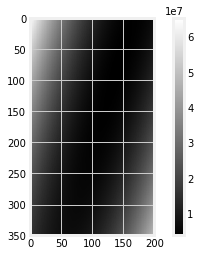

In [12]:
# Show the error array as an image.
# Black corresponds to low values, white to high values.
plt.imshow(errors, cmap='gray')
plt.colorbar()

The minimum over all pairs of intercepts and slopes is somewhere in the black area in the middle of that array.

We find the smallest error from the whole array:

In [13]:
min_error = np.min(errors)
min_error

3798981.48102873

Notice that this error is lower than the error we found when we assumed the intercept was zero:

In [14]:
sos_error(best_i0_slope)

5901409.5805078605

Using the tricks from [where and argmin](where_and_argmin), we find the row and column indices for the minimum value:

In [15]:
rows, cols = np.where(errors == min_error)
rows, cols

(array([80]), array([140]))

We can now get the corresponding intercept and slope pair:

In [16]:
# The intercept giving the minimum error (with the slope below).
best_intercept = some_intercepts[rows]
best_intercept

array([-220])

In [17]:
# The slope giving the minimum error (with the intercept above).
best_si_slope = some_slopes[cols]
best_si_slope

array([140])

We calculate the predicted values for our new best line:

In [18]:
si_predicted = best_intercept + fert * best_si_slope

Plot the new line along with our original line, that assumed a zero intercept.

Text(0.5, 1.0, 'Best-fit lines with and without intercept')

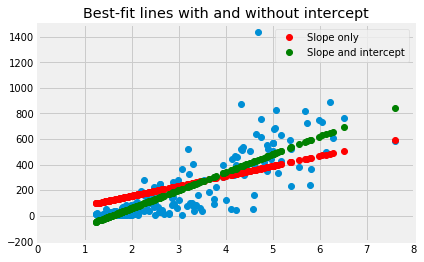

In [19]:
si_predicted = best_intercept + fert * best_si_slope
just_s_predicted = fert * best_i0_slope
plt.plot(fert, mmr, 'o')
plt.plot(fert, just_s_predicted, 'o', color='red', label='Slope only')
plt.plot(fert, si_predicted, 'o', color='green', label='Slope and intercept')
plt.legend()
plt.axis([0, 8, -200, 1500])
plt.title('Best-fit lines with and without intercept')

Now you know about [optimization](optimization), you will not be surprised to discover that Scipy `minimize` can also do the search for the intercept and slope pair for us.  We send `minimize` the function we are trying to minimize, and a starting guess for the intercept and slope.  In this case, we start with a guess of `[0, 100]`, but any reasonable guess will do.

In [20]:
from scipy.optimize import minimize
minimize(sos_si_error, [0, 100])

      fun: 3798879.4982295665
 hess_inv: array([[ 0., -0.],
       [-0.,  0.]])
      jac: array([ 0.  , -0.03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 65
      nit: 6
     njev: 16
   status: 2
  success: False
        x: array([-220.86,  140.42])

We won't spend any time justifying this, but this is also the answer we get from traditional fitting of the least-squares line, as implemented, for example, in the Scipy `linregress` function:

In [21]:
from scipy.stats import linregress
linregress(fert, mmr)

LinregressResult(slope=140.4171171547987, intercept=-220.8570729056681, rvalue=0.8327335391716736, pvalue=3.3173289077823836e-60, stderr=6.196624287694138)

Notice the values for `slope` and `intercept` in the output above.